In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\mohit\Downloads\NCRB_Table_3A.3.csv")

# Show first few rows
display(df.head())
print(df.columns)

,Sl. No.,State/UT,Cases Reported - Col.(3),Child Victims of Rape (Below 18 Yrs) - Below 6 Years - Col.(4),Child Victims of Rape (Below 18 Yrs) - 6 Years and Above - Below 12 Years - Col.(5),Child Victims of Rape (Below 18 Yrs) - 12 Years and Above - Below 16 Years - Col.(6),Child Victims of Rape (Below 18 Yrs) - 16 Years and Above - Below 18 Years - Col.(7),Child Victims of Rape (Below 18 Yrs) - Total Girl / Child Victims - Col.(8),Women Victims of Rape (Above 18 Years) - 18 Years and Above - Below 30 Years - Col.(9),Women Victims of Rape (Above 18 Years) - 30 Years and Above - Below 45 Years - Col.(10),Women Victims of Rape (Above 18 Years) - 45 Years and Above - Below 60 Years - Col.(11),Women Victims of Rape (Above 18 Years) - 60 Years and Above - Col.(12),Women Victims of Rape (Above 18 Years) - Total Women / Adult Victims - Col.(13),Total Victims (Col.8+Col.13) - Col.(14)
0,1,Andhra Pradesh,621.0,0.0,0.0,0.0,0.0,0.0,458.0,160,8.0,1.0,627.0,627
1,2,Arunachal Pradesh,74.0,1.0,3.0,17.0,9.0,30.0,24.0,19,1.0,0.0,44.0,74
2,3,Assam,1113.0,0.0,0.0,2.0,2.0,4.0,868.0,455,151.0,0.0,1474.0,1478
3,4,Bihar,881.0,0.0,0.0,0.0,0.0,0.0,644.0,225,10.0,2.0,881.0,881
4,5,Chhattisgarh,1246.0,0.0,0.0,0.0,0.0,0.0,786.0,408,47.0,5.0,1246.0,1246


Index(['Sl. No.', 'State/UT', 'Cases Reported - Col.(3)',
       'Child Victims of Rape (Below 18 Yrs) - Below 6 Years - Col.(4)',
       'Child Victims of Rape (Below 18 Yrs) - 6 Years and Above - Below 12 Years - Col.(5)',
       'Child Victims of Rape (Below 18 Yrs) - 12 Years and Above - Below 16 Years - Col.(6)',
       'Child Victims of Rape (Below 18 Yrs) - 16 Years and Above - Below 18 Years - Col.(7)',
       'Child Victims of Rape (Below 18 Yrs) - Total Girl / Child Victims - Col.(8)',
       'Women Victims of Rape (Above 18 Years) - 18 Years and Above - Below 30 Years - Col.(9)',
       'Women Victims of Rape (Above 18 Years) - 30 Years and Above - Below 45 Years - Col.(10)',
       'Women Victims of Rape (Above 18 Years) - 45 Years and Above - Below 60 Years - Col.(11)',
       'Women Victims of Rape (Above 18 Years) - 60 Years and Above - Col.(12)',
       'Women Victims of Rape (Above 18 Years) - Total Women / Adult Victims - Col.(13)',
       'Total Victims (Col.8+Col.13

In [3]:
df = df.rename(columns={
    "Cases Reported - Col.(3)": "Cases_Reported",
    "Child Victims of Rape (Below 18 Yrs) - Below 6 Years - Col.(4)": "Child_Below6",
    "Child Victims of Rape (Below 18 Yrs) - 6 Years and Above - Below 12 Years - Col.(5)": "Child_6to12",
    "Child Victims of Rape (Below 18 Yrs) - 12 Years and Above - Below 16 Years - Col.(6)": "Child_12to16",
    "Child Victims of Rape (Below 18 Yrs) - 16 Years and Above - Below 18 Years - Col.(7)": "Child_16to18",
    "Child Victims of Rape (Below 18 Yrs) - Total Child Victims (Below 18 Yrs) - Col.(8)": "Total_Child",
    "Women Victims of Rape (Above 18 Years) - 18 Years and Above - Below 30 Years - Col.(9)": "Women_18to30",
    "Women Victims of Rape (Above 18 Years) - 30 Years and Above - Below 45 Years - Col.(10)": "Women_30to45",
    "Women Victims of Rape (Above 18 Years) - 45 Years and Above - Below 60 Years - Col.(11)": "Women_45to60",
    "Women Victims of Rape (Above 18 Years) - 60 Years and Above - Col.(12)": "Women_60plus",
    "Women Victims of Rape (Above 18 Years) - Total Women / Adult Victims - Col.(13)": "Total_Women",
    "Total Victims (Col.8+Col.13) - Col.(14)": "Total_Victims"
})

In [4]:
df = df.drop(columns=["Sl. No."], errors="ignore")

# Remove rows with NaN
df = df.dropna()

display(df.head())

,State/UT,Cases_Reported,Child_Below6,Child_6to12,Child_12to16,Child_16to18,Child Victims of Rape (Below 18 Yrs) - Total Girl / Child Victims - Col.(8),Women_18to30,Women_30to45,Women_45to60,Women_60plus,Total_Women,Total_Victims
0,Andhra Pradesh,621.0,0.0,0.0,0.0,0.0,0.0,458.0,160,8.0,1.0,627.0,627
1,Arunachal Pradesh,74.0,1.0,3.0,17.0,9.0,30.0,24.0,19,1.0,0.0,44.0,74
2,Assam,1113.0,0.0,0.0,2.0,2.0,4.0,868.0,455,151.0,0.0,1474.0,1478
3,Bihar,881.0,0.0,0.0,0.0,0.0,0.0,644.0,225,10.0,2.0,881.0,881
4,Chhattisgarh,1246.0,0.0,0.0,0.0,0.0,0.0,786.0,408,47.0,5.0,1246.0,1246


<h4>Visulization</h4>

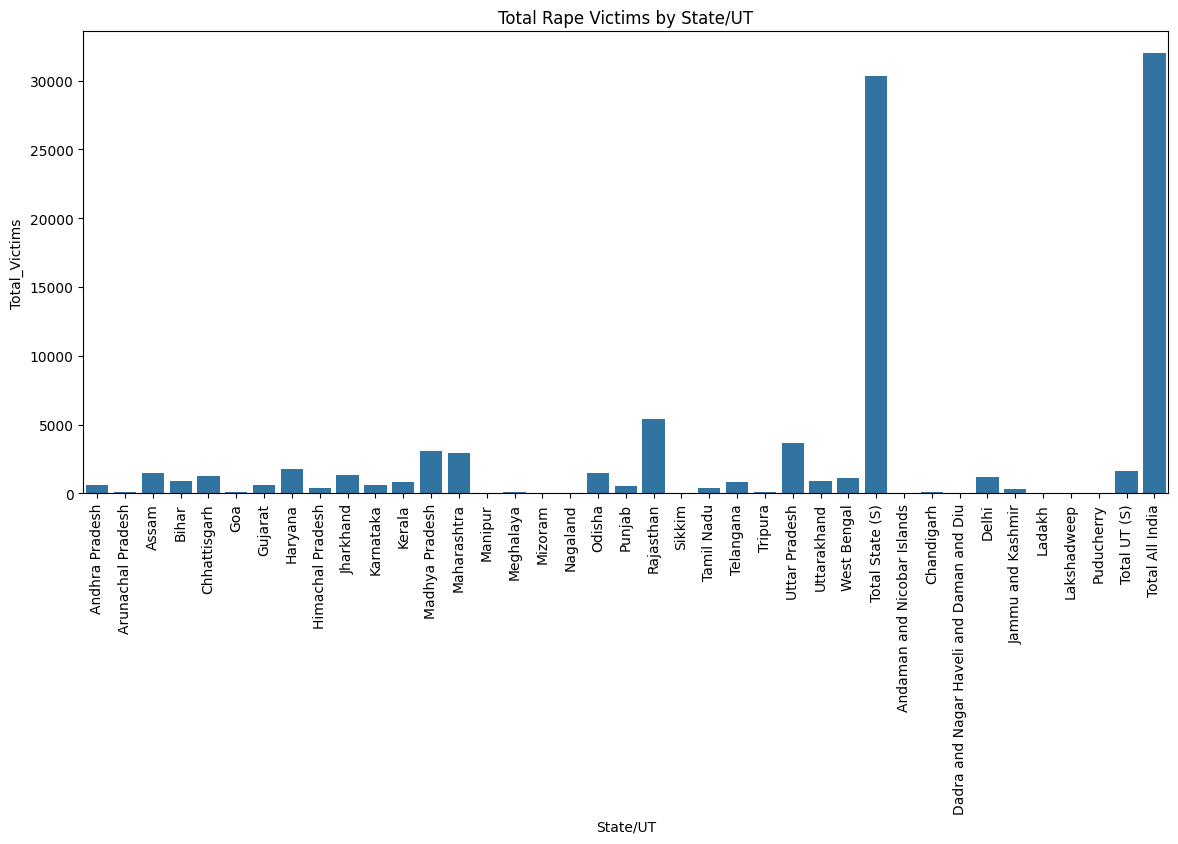

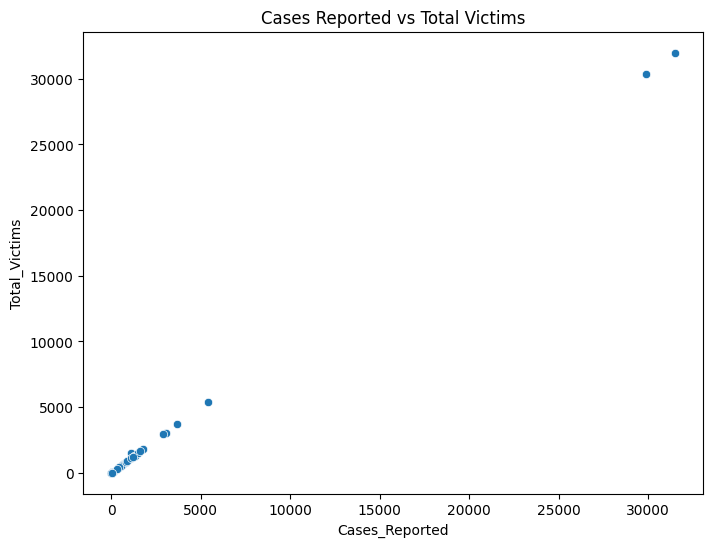

In [5]:
plt.figure(figsize=(14,6))
sns.barplot(x="State/UT", y="Total_Victims", data=df)
plt.xticks(rotation=90)
plt.title("Total Rape Victims by State/UT")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="Cases_Reported", y="Total_Victims", data=df)
plt.title("Cases Reported vs Total Victims")
plt.show()

<h4>Machine Learning Model</h4>

MSE: 4038.6212597222193
R2 Score: 0.9947362548982163


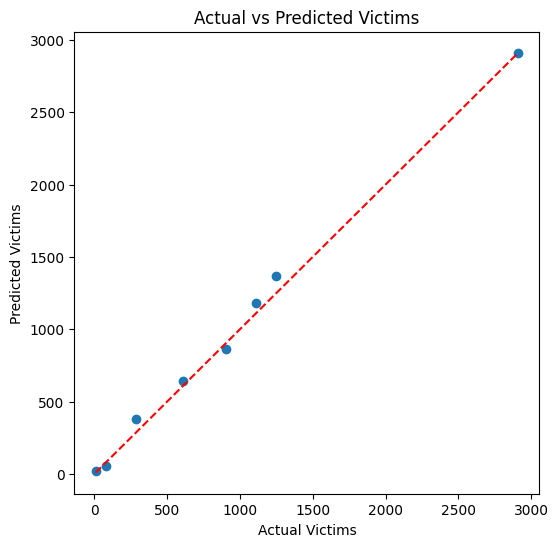

In [6]:
X = df[[
    "Cases_Reported", 
    "Child_Below6", "Child_6to12", "Child_12to16", "Child_16to18",
    "Women_18to30", "Women_30to45", "Women_45to60", "Women_60plus"
]]

# Target
y = df["Total_Victims"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Victims")
plt.ylabel("Predicted Victims")
plt.title("Actual vs Predicted Victims")
plt.show()

In [7]:
future_df = pd.DataFrame({
    "Cases_Reported": [500],
    "Child_Below6": [5],
    "Child_6to12": [10],
    "Child_12to16": [15],
    "Child_16to18": [20],
    "Women_18to30": [300],
    "Women_30to45": [150],
    "Women_45to60": [50],
    "Women_60plus": [10],
})

future_prediction = model.predict(future_df)
print("Predicted Victims =", future_prediction[0])

Predicted Victims = 521.9766666666667


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)



# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score (Accuracy):", r2)


R² Score (Accuracy): 0.9947362548982163
